In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

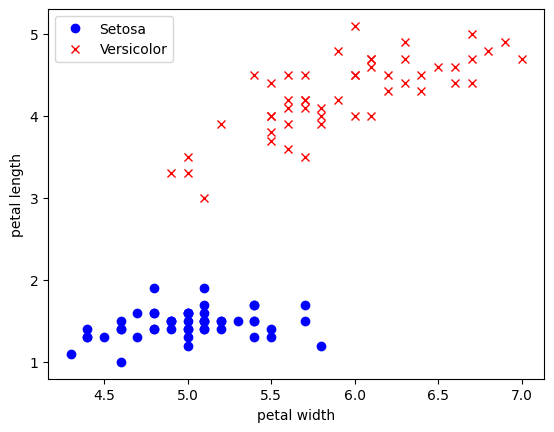

In [17]:
#import dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

#get the first 50 rows (which are all setosas) with only the first 2 features (petal length & width)
setosa = np.array(df.iloc[0:50, [0,2]])

#get rows 50-100 (which are all versicolor) with only the first 2 features (petal length & width)
versicolor = np.array(df.iloc[50:100, [0,2]])

#plot points where blue o's denote setosa & red x's denote versicolor
plt.plot(setosa[:, 0], setosa[:, 1], "bo", label="Setosa")
plt.plot(versicolor[:, 0], versicolor[:, 1], "rx", label="Versicolor")
plt.xlabel("petal width")
plt.ylabel("petal length")
plt.legend(loc='upper left')
plt.show()

In [18]:
class CustomPerceptron():
  #initialize hyperparameters (learning rate and number of iterations)
  def __init__(self, eta=0.1, n_iter=50):
    self.eta = eta
    self.n_iter = n_iter
  
  def fit(self, X, y):      
    self.w_ = [random.uniform(-1.0, 1.0) for _ in range(1+X.shape[1])] #randomly initialize weights
    self.errors_ = []   #keeps tracks of the number of errors per iteration for observation purposes

    #iterate over labelled dataset updating weights for each features accordingly
    for _ in range(self.n_iter):
      errors = 0
      for xi, label in zip(X, y):
        update = self.eta * (label-self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  #compute the net input i.e scalar sum of X and the weights plus the bias value
  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  #predict a classification for a sample of features X
  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)
      

In [19]:
#preparing our data to be understood by our model
X = df.iloc[0:100, [0,2]].values
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

ppn = CustomPerceptron(n_iter=20) #initializing a new perceptron
ppn.fit(X, y) #training

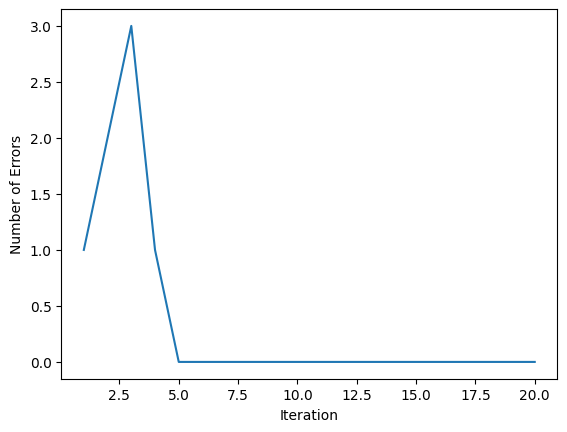

In [20]:
#plotting errors against number of iterations
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_)
plt.xlabel("Iteration")
plt.ylabel("Number of Errors")

plt.show()